# Exercice 3 - Introduction arbres de décision

## Premier exemple d'arbre de décision

### Construction du dataset 

- Créer le DataFrame de training : *dfUmbrella = pnd.DataFrame ( { 'Chance Rain':[0.1, 0.9, 0.3, 0.1, 0.8], 'UV Index': [11, 1, 3, 2, 2] , 'Umbrella' : [True, True, False, False, True] } )*
- Identifier dans deux variables les features et le target
- Créer le DataFrame de test : *x_test = pnd.DataFrame ( { 'Chance Rain':[0.5, 0.2], 'UV Index': [5, 8] } )* 



In [8]:
import pandas as pnd

In [9]:
dfUmbrella = pnd.DataFrame ( { 'Chance Rain':[0.1, 0.9, 0.3, 0.1, 0.8], 
                                'UV Index': [11, 1, 3, 2, 2] , 
                                'Umbrella' : [True, True, False, False, True] } )

dfUmbrella

,Chance Rain,UV Index,Umbrella
0,0.1,11,True
1,0.9,1,True
2,0.3,3,False
3,0.1,2,False
4,0.8,2,True


In [10]:
feature_names = ['Chance Rain', 'UV Index']
target = 'Umbrella'

print (feature_names, target)

['Chance Rain', 'UV Index'] Umbrella


In [11]:
x_test = pnd.DataFrame ({ 'Chance Rain':[0.5, 0.2], 
                            'UV Index': [5, 8] } ) 
x_test

,Chance Rain,UV Index
0,0.5,5
1,0.2,8


### Première arbre de décision

- Créer son objet ***DecisionTreeClassifier***
- Entrainer son modèle (***fit***)
- Tester son modèle (***predict***)


In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit (dfUmbrella[feature_names], dfUmbrella[target])

y_pred = clf.predict(x_test)

print (y_pred)

[False  True]


### Visualisation de l'arbre

- Utiliser export_text pour visualiser 
l’arbre de décision réalisée
- Utiliser plot_tree pour produire une image de l’arbre 
- Afficher l’importance des features utilisées 


In [13]:
from sklearn.tree import export_text

texte = export_text(clf, feature_names=feature_names, spacing=3, decimals=2)
print (texte)

|--- Chance Rain <= 0.55
|   |--- UV Index <= 7.00
|   |   |--- class: False
|   |--- UV Index >  7.00
|   |   |--- class: True
|--- Chance Rain >  0.55
|   |--- class: True



[Text(401.76000000000005, 362.4, 'Chance Rain <= 0.55\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Oui'),
 Text(267.84000000000003, 217.44, 'UV Index <= 7.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Non'),
 Text(133.92000000000002, 72.47999999999996, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Non'),
 Text(401.76000000000005, 72.47999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Oui'),
 Text(535.6800000000001, 217.44, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Oui')]

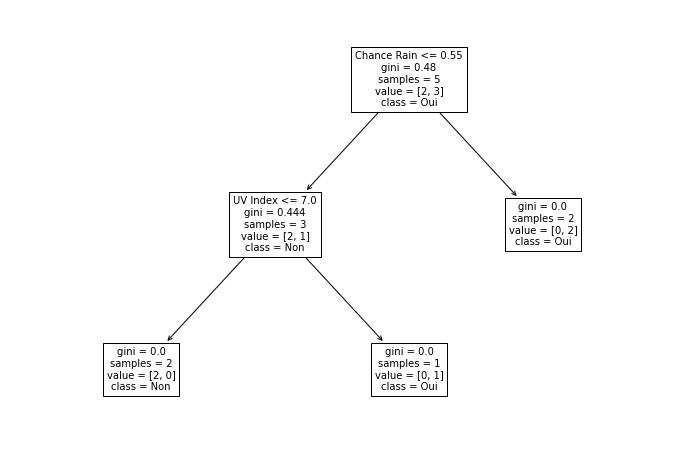

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(12,8))

plot_tree(clf, feature_names=feature_names, class_names=['Non', 'Oui'], fontsize=10)

In [15]:
importance = pnd.DataFrame ( {  'feature_names' : feature_names , 
                                'importance' : clf.feature_importances_ })
importance

,feature_names,importance
0,Chance Rain,0.444444
1,UV Index,0.555556
